In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [5]:
groups = {"SVC": 0, "Trees": 1, "NB": 2, "Neighbors":3, "Linear":4, "DA":5, "nn":6, "Dummy":7}
labels = ["SVC", "Trees", "NB", "Neighbors", "Linear", "DA", "Network", "Dummy"]
dir = "experiment1/finalgraphs"

MAE_matrix = np.zeros((8,8))
MAE_stdev = np.zeros((8,8))
CI_matrix = np.zeros((8,8))
CI_stdev = np.zeros((8,8))
CI_sizes = np.zeros((8,8))
CI_sizes_stdev = np.zeros((8,8))

for trained_on in groups.keys():
    for eval_on in groups.keys(): 
        file_dir = f"experiment1/trained{trained_on}/eval{eval_on}/aggregate/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(file_dir, 'r') as file:
            lines = file.readlines()
            
        print(trained_on + eval_on + lines[1])
        
        MAE_info = lines[1]
        percent_CI_info = lines[3]
        
        x = MAE_info.split(" ")[3].removeprefix("avg:").removesuffix(",")
        MAE = float(x)
        
        stdev = MAE_info.split(" ")[4].removeprefix("stdev:").removesuffix(",")
        stdev = float(stdev)
        
        MAE_matrix[groups[trained_on]][groups[eval_on]] = MAE
        MAE_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        percent_in_CI = eval(lines[2])
        percent_in_CI = [i * 100 for i in percent_in_CI]
        avg = np.average(percent_in_CI)
        stdev = np.std(percent_in_CI)
        
        CI_matrix[groups[trained_on]][groups[eval_on]] = avg
        CI_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        sizes = eval(lines[4])
        avg = np.average(sizes)
        stdev = np.std(sizes)
        
        CI_sizes[groups[trained_on]][groups[eval_on]] = avg
        CI_sizes_stdev[groups[trained_on]][groups[eval_on]] = stdev

print(MAE_matrix)

pass

SVCSVCMean absolute errors. avg:0.08935518749160422, stdev:0.08037876118275192

SVCTreesMean absolute errors. avg:0.08768356478563065, stdev:0.08278922666653815
SVCNBMean absolute errors. avg:0.10155003834813915, stdev:0.10599863389428185

SVCNeighborsMean absolute errors. avg:0.0904537891359416, stdev:0.08535528055954399

SVCLinearMean absolute errors. avg:0.09463755048940808, stdev:0.0846357081610633
SVCDAMean absolute errors. avg:0.10566618972812564, stdev:0.11172668656862687

SVCnnMean absolute errors. avg:0.10120227899488286, stdev:0.10356043694158477

SVCDummyMean absolute errors. avg:0.08868452787185806, stdev:0.07362766123504233

TreesSVCMean absolute errors. avg:0.09015020415815952, stdev:0.10036768937800945
TreesTreesMean absolute errors. avg:0.06195288209803433, stdev:0.08440481568037689

TreesNBMean absolute errors. avg:0.09947964137940007, stdev:0.1072133208554834
TreesNeighborsMean absolute errors. avg:0.08238132405332545, stdev:0.08236338518549459

TreesLinearMean absolu

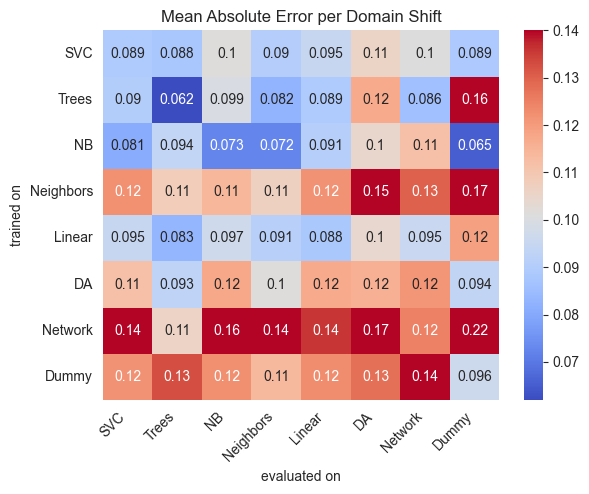

In [6]:
plot = sns.heatmap(MAE_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax=0.14,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error per Domain Shift"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

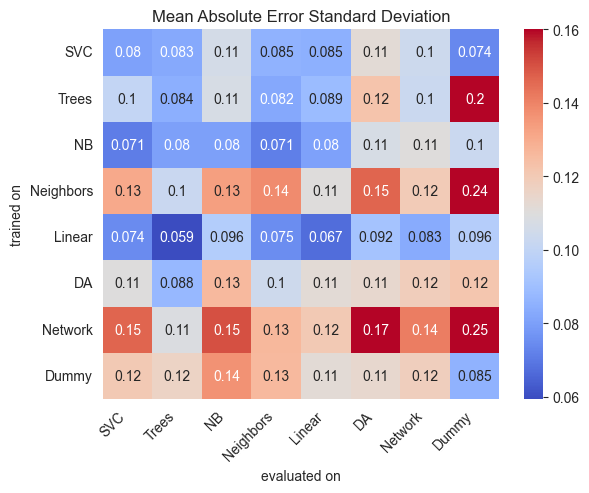

In [7]:
plot = sns.heatmap(MAE_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.16,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error Standard Deviation"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_20988\1807750150.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


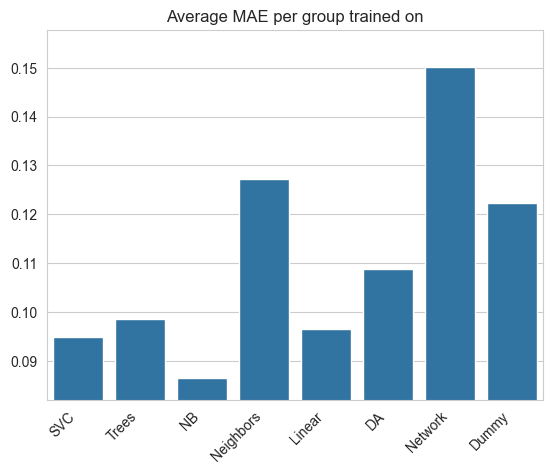

In [8]:
error_per_trained = np.average(MAE_matrix, axis=1)
high = max(error_per_trained) * 1.05
low = min(error_per_trained) * 0.95
plot = sns.barplot(x=labels, y=error_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group trained on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_20988\2552758926.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


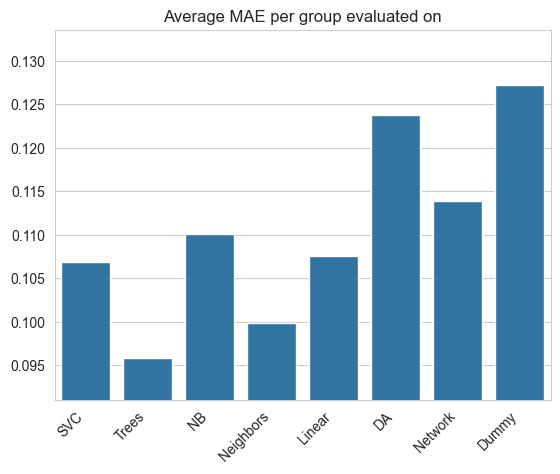

In [9]:
error_per_evaluated = np.average(MAE_matrix, axis=0)
high = max(error_per_evaluated) * 1.05
low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group evaluated on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

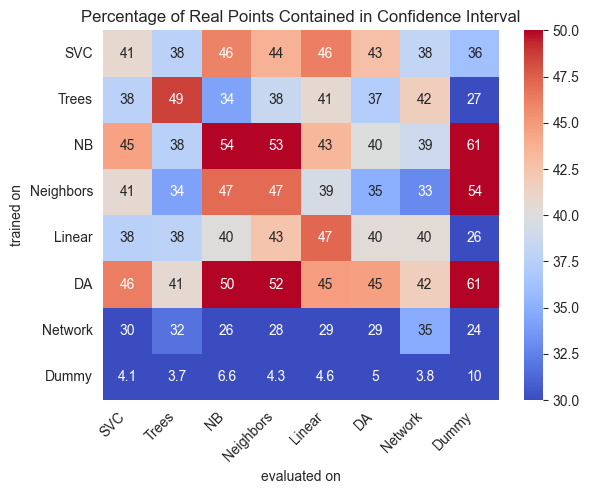

In [10]:
plot = sns.heatmap(CI_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax=50,
            vmin=30,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Percentage of Real Points Contained in Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

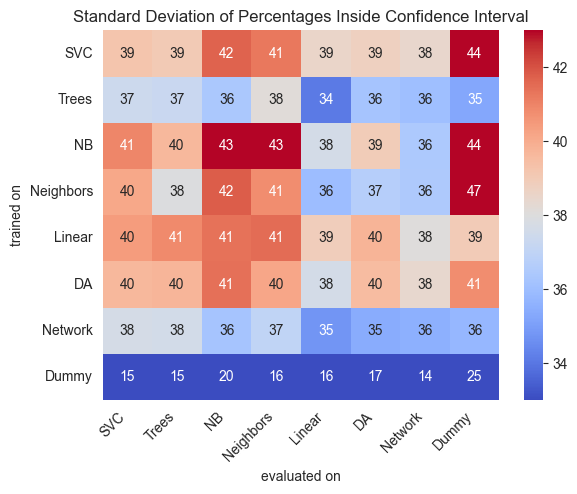

In [11]:
plot = sns.heatmap(CI_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax=43,
            vmin=33,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Percentages Inside Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

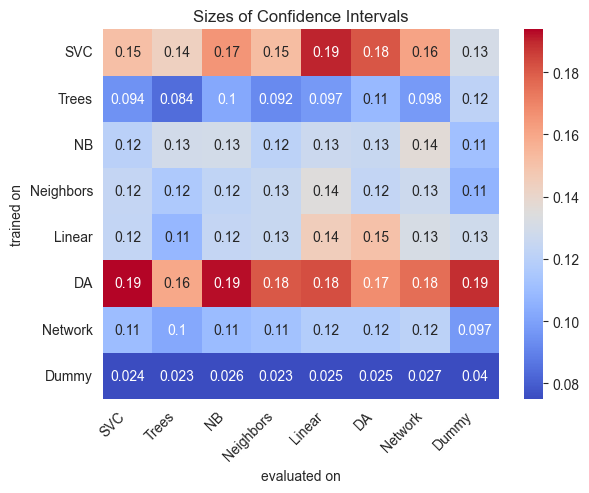

In [12]:
plot = sns.heatmap(CI_sizes, 
            cmap="coolwarm",
            annot=True,
            vmin=0.075,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

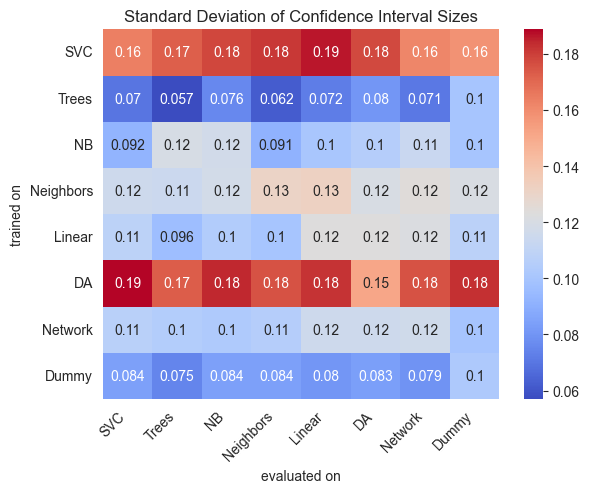

In [13]:
plot = sns.heatmap(CI_sizes_stdev, 
            cmap="coolwarm",
            annot=True,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Confidence Interval Sizes"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_20988\540695433.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


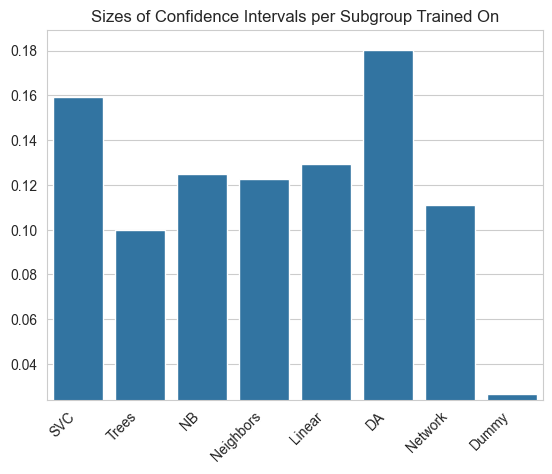

In [14]:
size_per_trained = np.average(CI_sizes, axis=1)
high = max(size_per_trained) * 1.05
low = min(size_per_trained) * 0.9
plot = sns.barplot(x=labels, y=size_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals per Subgroup Trained On"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

[[ 0.         -0.00167162  0.01219485  0.0010986   0.00528236  0.016311
   0.01184709 -0.00067066]
 [ 0.02819732  0.          0.03752676  0.02042844  0.0271559   0.05488399
   0.02388165  0.10151537]
 [ 0.00824496  0.02121958  0.         -0.00011316  0.0181953   0.03182233
   0.03933309 -0.00743638]
 [ 0.01520319  0.00137424  0.00721729  0.          0.01504664  0.03958722
   0.02308579  0.060309  ]
 [ 0.0064369  -0.00526903  0.00868895  0.00272925  0.          0.01601875
   0.00695589  0.0308028 ]
 [-0.00395504 -0.02273111  0.00178466 -0.01409638  0.00127059  0.
   0.00558364 -0.02209104]
 [ 0.01916716 -0.01903507  0.03111082  0.01552799  0.01088607  0.04469417
   0.          0.09928732]
 [ 0.02571089  0.03664311  0.02632264  0.01720208  0.02635784  0.03122702
   0.04422005  0.        ]]


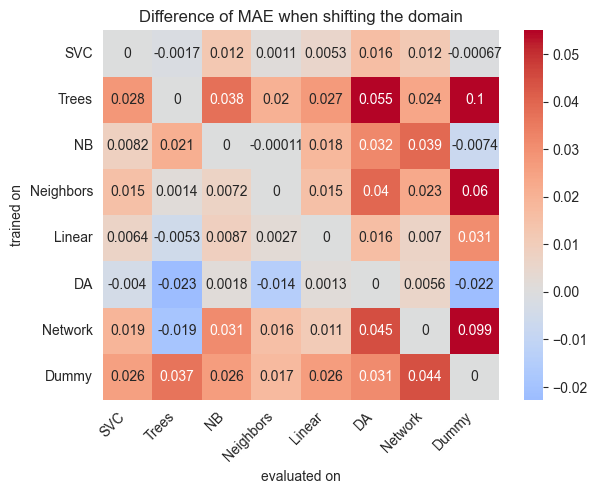

In [18]:
diff_matrix = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        diff_matrix[i][j] = MAE_matrix[i][j] - MAE_matrix[i][i]
print(diff_matrix)
# labels = labels[0:7]
plot = sns.heatmap(diff_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.055,
            center=0.0,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Difference of MAE when shifting the domain"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

['SVC', 'Trees', 'NB', 'Neighbors', 'Linear', 'DA', 'Network', 'Dummy']


C:\Users\maxso\AppData\Local\Temp\ipykernel_20988\3739192600.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


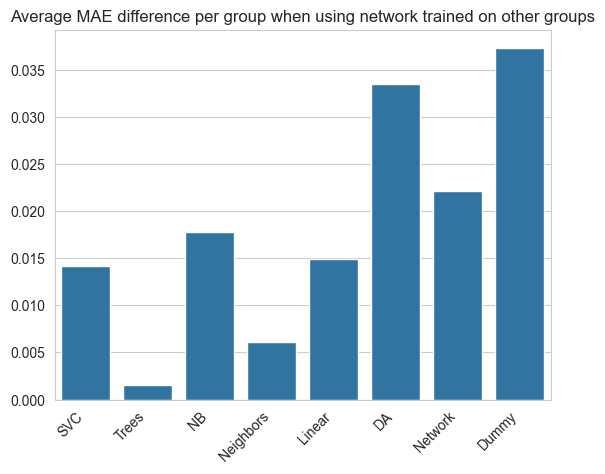

In [16]:
error_per_evaluated = np.sum(diff_matrix, axis=0)/7
# high = max(error_per_evaluated) * 1.05
# low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
print(labels)
# plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when using network trained on other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_20988\341652508.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


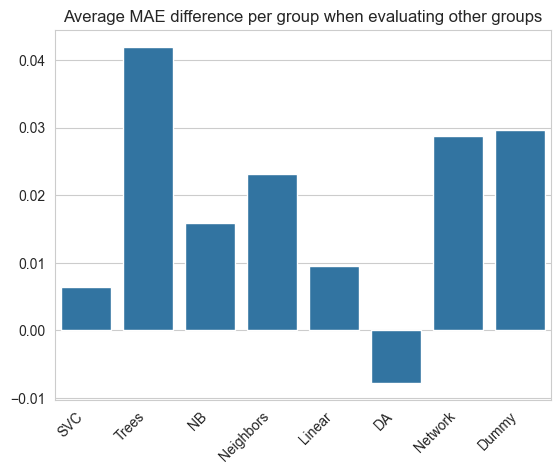

In [17]:
error_per_trained = np.sum(diff_matrix, axis=1)/7
plot = sns.barplot(x=labels, y=error_per_trained)
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when evaluating other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

['SVC', 'Trees', 'NB', 'Neighbors', 'Linear', 'DA', 'Network', 'Dummy']


C:\Users\maxso\AppData\Local\Temp\ipykernel_20988\1100610148.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


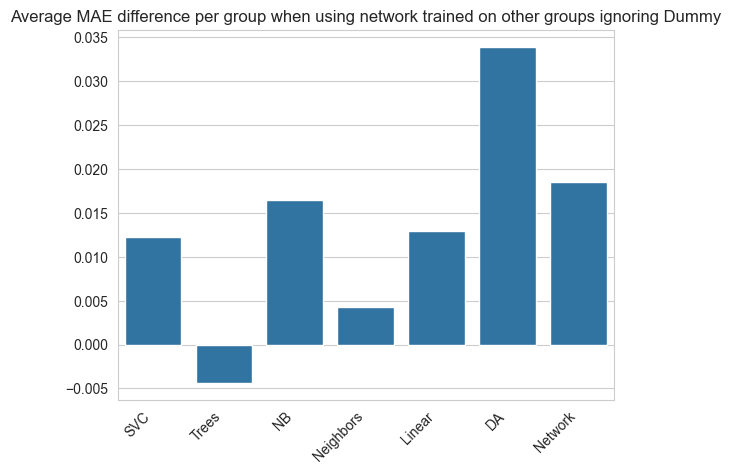

In [23]:
diff_without_dummy = diff_matrix[0:7, 0:7]
labels_without_dummy = labels[0:7]
error_per_evaluated = np.sum(diff_without_dummy, axis=0)/6
# high = max(error_per_evaluated) * 1.05
# low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels_without_dummy, y=error_per_evaluated)
print(labels)
# plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when using network trained on other groups ignoring Dummy"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_20988\3858231211.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


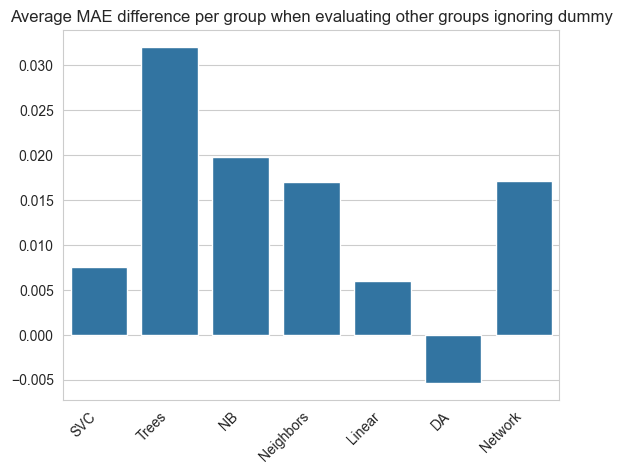

In [22]:
error_per_trained = np.sum(diff_without_dummy, axis=1)/6
plot = sns.barplot(x=labels_without_dummy, y=error_per_trained)
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when evaluating other groups ignoring dummy"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()